In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [30]:
df = pd.read_csv(r'PeakFlow_basinCaracteristics.txt', sep='\t')

In [31]:
df2 = df[['FM_name' ,  'Year', 'Month', 'Duration', 'rain_max','rain_past_5days','rain_past_2days', 'Frequency_yrs' ,'Flow_max','Flow_mean', 'Flow_total' ]]

In [32]:
df2.head()

,FM_name,Year,Month,Duration,rain_max,rain_past_5days,rain_past_2days,Frequency_yrs,Flow_max,Flow_mean,Flow_total
0,Columbus_B1,1996,6,0.08,0.35,0.03,0.03,1.0,1.61,0.1,0.0
1,InputA_King,1999,5,0.58,0.25,0.68,0.68,1.0,0.23,0.1,0.0
2,InputA_King,1999,7,0.33,0.67,1.08,0.18,1.0,0.17,0.1,0.0
3,InputA_King,1999,10,0.08,0.04,0.01,0.01,1.0,0.14,0.1,0.0
4,InputA_King,1999,6,0.08,0.12,0.05,0.05,1.0,0.13,0.1,0.0


In [ ]:
p = df2.hist()
p.plot()

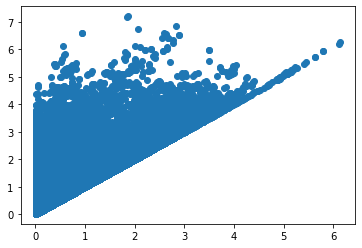

In [43]:
plt.scatter(df2.rain_past_2days, df2.rain_past_5days)

In [56]:
df2.columns

Index(['FM_name', 'Year', 'Month', 'Duration', 'rain_max', 'rain_past_5days',
       'rain_past_2days', 'Frequency_yrs', 'Flow_max', 'Flow_mean',
       'Flow_total'],
      dtype='object')

In [57]:
X = df2[[ 'Year', 'Month', 'Duration', 'rain_max', 'rain_past_5days',
       'rain_past_2days', 'Frequency_yrs']].values
y = df2.Flow_max

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135816, 7) (135816,)
Test set: (33954, 7) (33954,)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print (yhat[0:5] )

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

ValueError: Unknown label type: 'continuous'